# Deep Neural Networks on IMDB Analysis Data
1. LSTM
2. CNN
3. GRU
4. BiDirectional GRU
5. Bidirectional CNN



*Import Libraries and loading Data*

In [ ]:
!pip install contractions
import pandas as pd
import numpy as np
import re
import string
import contractions

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection
from keras import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras import layers, models, optimizers

df = pd.read_csv("/content/drive/My Drive/ML_Data/IMDB Dataset.csv")

x = df['review']
y = df['sentiment']

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


*Noise Removal and Normalizing Data*

In [ ]:
def normalize_text(sentence):
  sentence = sentence.strip()  # removes the starting and ending spaces
  sentence = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', sentence) # removes links with http/https
  sentence = re.sub(r'[\[].*\]', '', sentence) # removes square brackets and text present inside it.
  sentence = sentence.translate(str.maketrans('', '', string.punctuation)) # removes punctuation.
  sentence = contractions.fix(sentence) # fixes contractions
  sentence = sentence.lower() # converts to lower case
  return sentence

x = x.apply(lambda val : normalize_text(val))

label = preprocessing.LabelEncoder()
y = label.fit_transform(y)

In [ ]:
# # Encoding the input text

# count_label = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
# x_count = count_label.fit_transform(x)

# tfidf_word_label = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
# x_tfidf_word = tfidf_word_label.fit_transform(x)

# tfidf_ngram_word_label = TfidfVectorizer(analyzer='word', ngram_range=(2, 3), token_pattern=r'\w{1,}', max_features=5000)
# x_ngram_tfidf_word = tfidf_ngram_word_label.fit_transform(x)

# tfidf_char_label = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', max_features=5000)
# x_tfidf_char = tfidf_char_label.fit_transform(x)

# tfidf_ngram_char_label = TfidfVectorizer(analyzer='char', ngram_range=(2, 3), token_pattern=r'\w{1,}', max_features=5000)
# x_ngram_tfidf_char = tfidf_ngram_char_label.fit_transform(x)


In [ ]:
# x_train_count, x_test_count, y_train, y_test = train_test_split(x_count, y, test_size=0.2, random_state=42)

# x_train_tfidf_word, x_test_tfidf_word, y_train, y_test = train_test_split(x_tfidf_word, y, test_size=0.2, random_state=42)

# x_train_ngram_tfidf_word, x_test_ngram_tfidf_word, y_train, y_test = train_test_split(x_ngram_tfidf_word, y, test_size=0.2, random_state=42)

# x_train_tfidf_char,  x_test_tfidf_char, y_train, y_test = train_test_split(x_tfidf_char, y, test_size=0.2, random_state=42)

# x_train_ngram_tfidf_char,  x_test_ngram_tfidf_char, y_train, y_test = train_test_split(x_ngram_tfidf_char, y, test_size=0.2, random_state=42)


*Encoding /Tokenizing the Data*

In [ ]:
token = Tokenizer()
token.fit_on_texts(x)

word_index = token.word_index

x = pad_sequences(token.texts_to_sequences(x), maxlen=70)

x_train_seq, x_test_seq, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# y_train = to_categorical(y_train)

*Training, Predicting Test data and Calculating Accuracy*

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def NN_model_training(model, x_train, y_train, x_test, y_test):

  model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2 )

  y_pred = model.predict_classes(x_test)

  return accuracy_score(y_pred, y_test)

accuracyAnalysis = {}

*LSTM Model Analysis*

In [ ]:
def LSTM_classification(x_train_seq):

  model = Sequential()
  model.add(layers.Embedding(input_dim=len(word_index)+1, output_dim=300, input_length=x_train_seq.shape[1]))
  model.add(layers.LSTM(100))
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()

  return model

model = LSTM_classification(x_train_seq)

accuracy = NN_model_training(model, x_train_seq, y_train, x_test_seq, y_test)

print("LSTM accuracy score: ", accuracy)
accuracyAnalysis["LSTM accuracy score"] = accuracy

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 70, 300)           54712200  
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 54,877,701
Trainable params: 54,877,701
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 185s 6ms/step - loss: 0.4183 - accuracy: 0.8048 - val_loss: 0.3705 - val_accuracy: 0.8336
Epoch 2/10
32000/32000 [==============================] - 184s 6ms/step - loss: 0.1927 - accuracy: 0.9258 - val_loss: 0.4473 - val_accuracy: 0.8324
Epoch 3/10
32000/32000 [==============================] - 184s 6ms/step - loss: 0.0840 - accuracy: 0.9698 - val_loss: 0.5676 - val_accuracy: 0.8290
Epoch 4/10
32000/32000 [==============================] - 181s 6ms/step - loss: 0.0442 - accuracy: 0.9848 - val_loss: 0.6948 - val_accuracy: 0.8166
Epoch 5/10
32000/32000 [==============================] - 183s 6ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.8057 - val_accuracy: 0.8209
Epoch 6/10
32000/32000 [==============================] - 182s 6ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.9516 - val_accuracy: 0.8224
Epoch 7/10
32000/32000 [==============================] - 179s 

*CNN Model Analysis*

In [ ]:
def CNN_classification(x_train_seq):

  model = Sequential()
  model.add(layers.Embedding(input_dim=len(word_index)+1, output_dim=300, input_length=x_train_seq.shape[1]))
  model.add(layers.SpatialDropout1D(0.3))
  model.add(layers.Convolution1D(100, 3, activation='relu'))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(100, activation='relu'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  model.summary()

  return model
model = CNN_classification(x_train_seq)

accuracy = NN_model_training(model, x_train_seq, y_train, x_test_seq, y_test)

print("CNN accuracy score: ", accuracy)
accuracyAnalysis["CNN accuracy score"] = accuracy

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 70, 300)           54712200  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 70, 300)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 68, 100)           90100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 67s 2ms/step - loss: 0.4494 - accuracy: 0.7777 - val_loss: 0.3502 - val_accuracy: 0.8460
Epoch 2/10
32000/32000 [==============================] - 63s 2ms/step - loss: 0.2249 - accuracy: 0.9118 - val_loss: 0.3586 - val_accuracy: 0.8493
Epoch 3/10
32000/32000 [==============================] - 62s 2ms/step - loss: 0.0661 - accuracy: 0.9775 - val_loss: 0.4767 - val_accuracy: 0.8338
Epoch 4/10
32000/32000 [==============================] - 62s 2ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.6315 - val_accuracy: 0.8374
Epoch 5/10
32000/32000 [==============================] - 62s 2ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.7022 - val_accuracy: 0.8345
Epoch 6/10
32000/32000 [==============================] - 62s 2ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.8325 - val_accuracy: 0.8322
Epoch 7/10
32000/32000 [==============================] - 62s 2ms/ste

*GRU Model Analysis*

In [ ]:
def GRU_classification(x_train_seq):

  model = Sequential()
  model.add(layers.Embedding(input_dim=len(word_index)+1, output_dim=300, input_length=x_train_seq.shape[1]))
  model.add(layers.SpatialDropout1D(0.3))
  model.add(layers.GRU(100))
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()

  return model

model = GRU_classification(x_train_seq)

accuracy = NN_model_training(model, x_train_seq, y_train, x_test_seq, y_test)

print("GRU accuracy score: ", accuracy)
accuracyAnalysis["GRU accuracy score"] = accuracy

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 70, 300)           54712200  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 70, 300)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               120300    
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 54,837,601
Trainable params: 54,837,601
Non-trainable params: 0
__________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 210s 7ms/step - loss: 0.4295 - accuracy: 0.7974 - val_loss: 0.3586 - val_accuracy: 0.8421
Epoch 2/10
32000/32000 [==============================] - 208s 7ms/step - loss: 0.2079 - accuracy: 0.9191 - val_loss: 0.4036 - val_accuracy: 0.8301
Epoch 3/10
32000/32000 [==============================] - 209s 7ms/step - loss: 0.0868 - accuracy: 0.9698 - val_loss: 0.4874 - val_accuracy: 0.8288
Epoch 4/10
32000/32000 [==============================] - 210s 7ms/step - loss: 0.0373 - accuracy: 0.9873 - val_loss: 0.6437 - val_accuracy: 0.8278
Epoch 5/10
32000/32000 [==============================] - 209s 7ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.8484 - val_accuracy: 0.8192
Epoch 6/10
32000/32000 [==============================] - 210s 7ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.9196 - val_accuracy: 0.8230
Epoch 7/10
32000/32000 [==============================] - 211s 

*BiDirectional GRU Model Analysis*

In [ ]:
def BiDirectional_GRU_classification(x_train_seq):

  model = Sequential()
  model.add(layers.Embedding(input_dim=len(word_index)+1, output_dim=300, input_length=x_train_seq.shape[1]))
  model.add(layers.SpatialDropout1D(0.3))
  model.add(layers.Bidirectional(layers.GRU(100)))
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()

  return model

model = BiDirectional_GRU_classification(x_train_seq)

accuracy = NN_model_training(model, x_train_seq, y_train, x_test_seq, y_test)

print("BiDirectional GRU accuracy score: ", accuracy)
accuracyAnalysis["BiDirectional GRU accuracy score"] = accuracy

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 70, 300)           54712200  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 70, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240600    
_________________________________________________________________
dense_13 (Dense)             (None, 50)                10050     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 54,962,901
Trainable params: 54,962,901
Non-trainable params: 0
__________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 349s 11ms/step - loss: 0.4267 - accuracy: 0.7990 - val_loss: 0.3418 - val_accuracy: 0.8491
Epoch 2/10
32000/32000 [==============================] - 348s 11ms/step - loss: 0.1966 - accuracy: 0.9236 - val_loss: 0.3726 - val_accuracy: 0.8372
Epoch 3/10
32000/32000 [==============================] - 345s 11ms/step - loss: 0.0647 - accuracy: 0.9771 - val_loss: 0.6093 - val_accuracy: 0.8303
Epoch 4/10
32000/32000 [==============================] - 346s 11ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 0.7835 - val_accuracy: 0.8230
Epoch 5/10
32000/32000 [==============================] - 342s 11ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.9875 - val_accuracy: 0.8217
Epoch 6/10
32000/32000 [==============================] - 343s 11ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 1.0585 - val_accuracy: 0.8201
Epoch 7/10
32000/32000 [==============================] -

*BiDirectional CNN Analysis*

In [ ]:
def BiDirectional_CNN_classification(x_train_seq):

  model = Sequential()
  model.add(layers.Embedding(input_dim=len(word_index)+1, output_dim=300, input_length=x_train_seq.shape[1]))
  model.add(layers.SpatialDropout1D(0.3))
  model.add(layers.Bidirectional(layers.GRU(50, return_sequences=True)))
  model.add(layers.Convolution1D(100, 3, activation='relu'))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(100, activation='relu'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  model.summary()

  return model
model = BiDirectional_CNN_classification(x_train_seq)

accuracy = NN_model_training(model, x_train_seq, y_train, x_test_seq, y_test)

print("BiDirectional CNN accuracy score: ", accuracy)
accuracyAnalysis["BiDirectional CNN accuracy score"] = accuracy

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 70, 300)           54712200  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 70, 300)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 70, 100)           105300    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 68, 100)           30100     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)              

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 349s 11ms/step - loss: 0.4220 - accuracy: 0.7970 - val_loss: 0.3311 - val_accuracy: 0.8537
Epoch 2/10
32000/32000 [==============================] - 348s 11ms/step - loss: 0.2030 - accuracy: 0.9206 - val_loss: 0.3829 - val_accuracy: 0.8530
Epoch 3/10
32000/32000 [==============================] - 346s 11ms/step - loss: 0.0788 - accuracy: 0.9718 - val_loss: 0.5186 - val_accuracy: 0.8403
Epoch 4/10
32000/32000 [==============================] - 346s 11ms/step - loss: 0.0323 - accuracy: 0.9889 - val_loss: 0.6056 - val_accuracy: 0.8365
Epoch 5/10
32000/32000 [==============================] - 344s 11ms/step - loss: 0.0164 - accuracy: 0.9942 - val_loss: 0.8807 - val_accuracy: 0.8365
Epoch 6/10
32000/32000 [==============================] - 348s 11ms/step - loss: 0.0130 - accuracy: 0.9952 - val_loss: 1.0877 - val_accuracy: 0.8276
Epoch 7/10
32000/32000 [==============================] -

In [ ]:
accuracyAnalysis
metrics = sorted(accuracyAnalysis.items(), key=(lambda x: x[1]), reverse=True)
metrics

[('CNN accuracy score', 0.8307),
 ('BiDirectional CNN accuracy score', 0.8291),
 ('GRU accuracy score', 0.8229),
 ('BiDirectional GRU accuracy score', 0.8211),
 ('LSTM accuracy score', 0.8191)]

/bin/bash: matplotlib: command not found


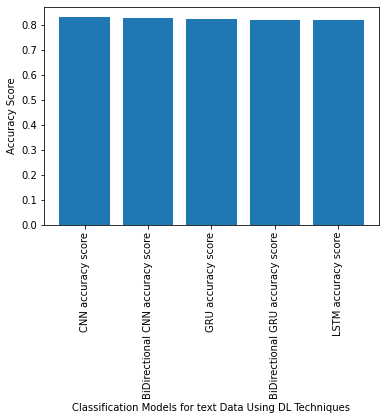

In [ ]:
import matplotlib.pyplot as plt
!matplotlib inline

x_metrics = []
y_metrics = []

for i in metrics:
  x_metrics.append(i[0])
  y_metrics.append(i[1])


plt.xlabel("Classification Models for text Data Using DL Techniques")
plt.ylabel("Accuracy Score")
# plt.plot(x_metrics_lemmet, y_metrics_lemmet)
plt.bar(x_metrics, y_metrics)
plt.xticks(x_metrics, rotation='vertical')
plt.show()